In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import BoardExtractor
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [3]:
classes = [x for x in os.listdir('Dataset') if x[0]=='B' or x[0]=='W']
print(classes)

['B-Bishop', 'B-King', 'B-Knight', 'B-Pawn', 'B-Queen', 'B-Rook', 'W-Bishop', 'W-King', 'W-Knight', 'W-Pawn', 'W-Queen', 'W-Rook']


In [4]:
train_datagen = ImageDataGenerator(
        rotation_range=2, # rotation
        # width_shift_range=0.1, # horizontal shift
        # height_shift_range=0.1, # vertical shift
        zoom_range=0.1, # zoom
        # shear_range=0.1,
        horizontal_flip=True, # horizontal flip
        # brightness_range=[0.2,1.2],
        validation_split=0.2) # brightness

train_generator = train_datagen.flow_from_directory(
    "Dataset/",
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
valid_generator = train_datagen.flow_from_directory(
    "Dataset/",
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 2916 images belonging to 12 classes.
Found 720 images belonging to 12 classes.


In [19]:
#Simple CNN Model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5,5), padding='valid',input_shape=train_generator.image_shape,activation='relu' ))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(Conv2D(256, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu' ))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dense_3 (Dense)              (None, 12)               

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
checkpoint = ModelCheckpoint('best_model_multi.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(
    x = train_generator,
    validation_data = valid_generator,
    epochs = 20,
    callbacks = [checkpoint],
    verbose=1)

Epoch 1/20
183/183 [==============================] - 60s 327ms/step - loss: 62.3089 - accuracy: 0.3879 - val_loss: 0.8058 - val_accuracy: 0.7153

Epoch 00001: val_accuracy improved from -inf to 0.71528, saving model to best_model_multi.h5
Epoch 2/20
183/183 [==============================] - 67s 364ms/step - loss: 0.7641 - accuracy: 0.7660 - val_loss: 0.9909 - val_accuracy: 0.6792

Epoch 00002: val_accuracy did not improve from 0.71528
Epoch 3/20
183/183 [==============================] - 66s 360ms/step - loss: 0.7003 - accuracy: 0.7892 - val_loss: 0.4034 - val_accuracy: 0.9028

Epoch 00003: val_accuracy improved from 0.71528 to 0.90278, saving model to best_model_multi.h5
Epoch 4/20
183/183 [==============================] - 69s 378ms/step - loss: 0.3318 - accuracy: 0.9152 - val_loss: 0.3226 - val_accuracy: 0.9153

Epoch 00004: val_accuracy improved from 0.90278 to 0.91528, saving model to best_model_multi.h5
Epoch 5/20
183/183 [==============================] - 67s 365ms/step - loss

In [9]:
def plot_graph(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

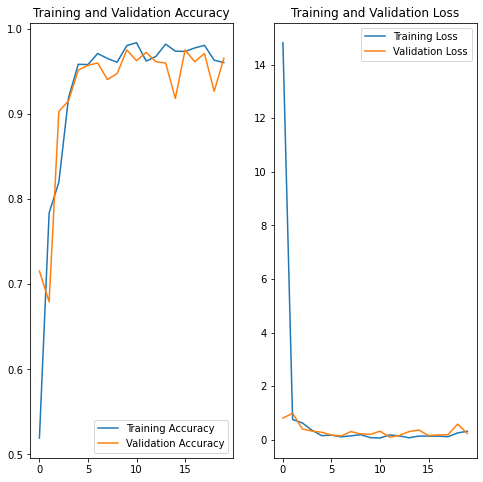

In [24]:
plot_graph(history,20)